In [400]:
import numpy 
import math 
from scipy import integrate
from matplotlib import pyplot 

In [401]:
# free stream speed
u_inf = 1.0

In [402]:
# defines the cylinder
R = 1.0                                                           # radius
theta = numpy.linspace(0, 2*math.pi, 100)                         # angles in radians
x_cylinder, y_cylinder = R*numpy.cos(theta), R*numpy.sin(theta)   # coordinates of the cylinder


%matplotlib inline

In [403]:
class Panel:
    """Contains information related to a panel."""
    def __init__(self, xa, ya, xb, yb):
        """Initializes the panel.
        
        Arguments
        ---------
        xa, ya -- coordinates of the first end-point of the panel.
        xb, yb -- coordinates of the second end-point of the panel.
        """
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2       # control-point (center-point)
        self.length = math.sqrt((xb-xa)**2+(yb-ya)**2)     # length of the panel
        
        # orientation of the panel (angle between x-axis and panel's normal)

        self.beta = math.atan2((yb-ya),(xb-xa))
        
        
        
            
        
        self.sigma = 1.0                             # source strength
        
        self.n= [math.sin(self.beta), -math.cos(self.beta)]  #Normal Vector
        self.t= [-math.cos(self.beta), -math.sin(self.beta)] # tangential vector
        self.cp = 0.                                # pressure coefficient
    

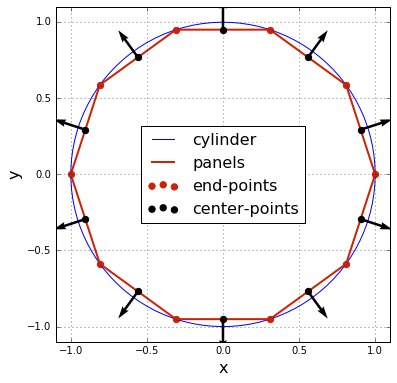

In [404]:
N_panels = 10                   # number of panels desired

# defining the end-points of the panels
x_ends = R*numpy.cos(numpy.linspace(0, 2*math.pi, N_panels+1))
y_ends = R*numpy.sin(numpy.linspace(0, 2*math.pi, N_panels+1))

# defining the panels
panels = numpy.empty(N_panels, dtype=object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
    
# plotting the panels
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_cylinder, y_cylinder, color='b', linestyle='-', linewidth=1)
pyplot.plot(x_ends, y_ends, color='#CD2305', linestyle='-', linewidth=2)
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels], color='#CD2305', s=40)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels], color='k', s=40, zorder=3)
pyplot.legend(['cylinder', 'panels', 'end-points', 'center-points'], 
           loc='best', prop={'size':16})
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);
pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [p.n[0] for p in panels] ,[p.n[1] for p in panels],scale = 10,  color='k',zorder=3)
#pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [p.t[0] for p in panels] ,[p.t[1] for p in panels],scale = 10,  color='k',zorder=3)



In [405]:
def get_source_panel_velocity (panel,xp,yp):
    xpnew = (xp-panel.xb)*panel.t[0]+(yp-panel.yb)*panel.t[1] #rotation of coordinates
    ypnew = (xp-panel.xb)*panel.n[0]+(yp-panel.yb)*panel.n[1]
    
    xbnew = 0
    ybnew = 0
    
    xanew = (panel.xa-panel.xb)*panel.t[0]+(panel.ya-panel.yb)*panel.t[1] #new coordinates of the panels
    yanew = (panel.ya-panel.yb)*panel.n[1]+(panel.xa-panel.xb)*panel.n[0]
    
    #velocity in transformed and rotated coordinates
    u = (panel.sigma/(4*math.pi))*math.log(((xpnew-xanew)**2+ypnew**2)/((xpnew-xbnew)**2+ypnew**2),math.exp(1)) 
    v = (panel.sigma/(2*math.pi))*(math.atan2(ypnew,(xpnew-xbnew))-math.atan2(ypnew,(xpnew-xanew)))
    
    #Velocity in global coordinates
    unew = (u)*panel.n[1]+(v)*panel.n[0] 
    vnew = (u)*panel.t[1]+(v)*panel.t[0]
    
    return unew,vnew

In [441]:
def build_matrix(panels):
      
    N = 10
    A = numpy.empty((N, N), dtype=float)
    numpy.fill_diagonal(A, 0.5)
    
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A[i,j] = numpy.dot(get_source_panel_velocity(p_j,p_i.xc, p_i.yc),p_i.n)
            
    #numpy.dot(funcion(),panels[i].t)
    return A

print (A)

[[  0.00000000e+00  -4.62387824e-02  -0.00000000e+00   5.32647348e-02
    8.65277861e-02   8.66116904e-02   5.34771128e-02   2.38877117e-17
   -5.25200082e-02  -7.48159216e-02]
 [ -7.48159216e-02   0.00000000e+00  -0.00000000e+00   5.25200082e-02
    8.61841513e-02   8.65277861e-02   5.35289685e-02   2.39829571e-17
   -5.32647348e-02  -8.49791584e-02]
 [ -8.49791584e-02  -4.62387824e-02   0.00000000e+00   4.62387824e-02
    8.49791584e-02   8.61841513e-02   5.34771128e-02   2.40062129e-17
   -5.34771128e-02  -8.61841513e-02]
 [ -8.61841513e-02  -5.25200082e-02  -0.00000000e+00   0.00000000e+00
    7.48159216e-02   8.49791584e-02   5.32647348e-02   2.39829571e-17
   -5.35289685e-02  -8.65277861e-02]
 [ -8.65277861e-02  -5.32647348e-02  -0.00000000e+00   4.62387824e-02
    0.00000000e+00   7.48159216e-02   5.25200082e-02   2.38877117e-17
   -5.34771128e-02  -8.66116904e-02]
 [ -8.66116904e-02  -5.34771128e-02  -0.00000000e+00   5.25200082e-02
    7.48159216e-02   0.00000000e+00   4.62387

In [407]:
class Freestream:

    def __init__(self, u_inf, alpha):
        
        self.u_inf = u_inf
        self.alpha = alpha*math.pi/180  

In [408]:
alpha = 0.0                               

In [409]:
N=N_panels 
b = numpy.empty((N), dtype='float')
for i in range(N):
    b[i] = -numpy.dot(numpy.array([u_inf,0]), (panels[i].n))
        
        

In [410]:
# Solves System
sigma = numpy.linalg.solve(A, b)

for i, panel in enumerate(panels):
    panel.sigma = sigma[i]
    


In [436]:
C = numpy.empty((N_panels, N_panels), dtype=float)
numpy.fill_diagonal(C, 0.0)
for i, p_i in enumerate(panels):
    for j, p_j in enumerate(panels):
        if i != j:
            C[i,j] = numpy.dot(get_source_panel_velocity(p_j,p_i.xc, p_i.yc),(panels[i].t))
    #numpy.dot(funcion(),panels[i].t)
 
d = numpy.empty((N_panels), dtype='float')
for i in range(N_panels):
    d[i] = numpy.dot(numpy.array([u_inf,0]), (panels[i].t))

# Solves System
sigma = numpy.linalg.solve(C, d)
print (sigma)
for i, panel in enumerate(panels):
    panel.sigma = sigma[i]
    


In [437]:
# Calculates Tangental Velocity
vt = numpy.dot(C, sigma) + d
print (sigma)

for i, panel in enumerate(panels):
    panel.vt = vt[i] 

[ -1.68949981e+00  -1.04416831e+00   0.00000000e+00   1.04416831e+00
   1.68949981e+00   1.68949981e+00   1.04416831e+00   4.68279651e-16
  -1.04416831e+00  -1.68949981e+00]


In [438]:
#calculating C_p
for panel in panels:
    panel.cp = 1.0 - (panel.vt/u_inf)**2
    
cp_exact = 1.0 - 4*(y_cylinder/R)**2

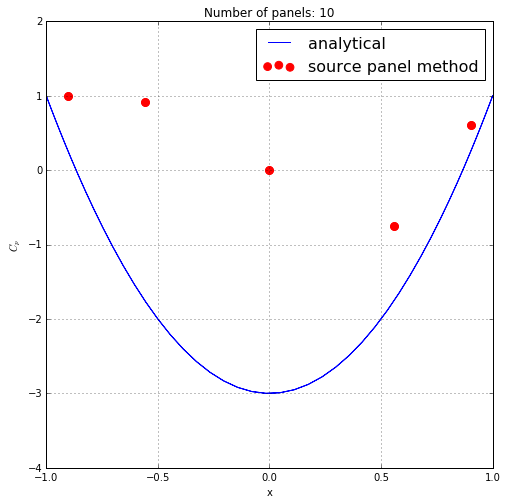

In [439]:

%matplotlib inline
size=8
pyplot.figure(figsize=(size,size))
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('$C_p$')
pyplot.xlim(-R,R)
pyplot.ylim(-4.0,2.0)
pyplot.plot(x_cylinder, cp_exact, color='b', linestyle='-', linewidth=1,\
    zorder=1)
pyplot.scatter([p.xc for p in panels], [p.cp for p in panels], color='r',\
    s=60, zorder=2)
pyplot.title('Number of panels: %d' % N_panels)
pyplot.legend(['analytical', 'source panel method'], loc='best', prop=\
    {'size':16});

In [ ]:
#transforming into Joukowsky 
N_panels = 20
T  = 0.12
c = 1 
H = 0
a = c/4
theta = numpy.linspace(0, 2*math.pi, N_panels+1) 
Zeta_c = -4*a/(3*math.sqrt(3))*T+1j*2*H
r_s = ((1/4)+(T/(3*math.sqrt(3))))*c
 
Zeta = (r_s)*numpy.exp(1j*(theta))

J = (Zeta+Zeta_c) + a**2/(Zeta+Zeta_c)

x_ends = J.real
y_ends = J.imag

x_ends = x_ends[::-1]
y_ends = y_ends[::-1]

panels = numpy.empty(N_panels, dtype=object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
    

In [ ]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

pyplot.plot(x_ends, y_ends, color='#CD2305', linestyle='-', linewidth=2)
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels], color='#CD2305', s=10)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels], color='k', s=10, zorder=3)
pyplot.axis("equal")
pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [-p.n[0] for p in panels] ,[-p.n[1] for p in panels], scale = 10, color='k',zorder=3)

pyplot.legend([ 'panels', 'end-points', 'center-points'], 
           loc='best', prop={'size':16})

In [ ]:
k = 1.0 #strength
panel = Panel(0.,0.01,0.5,0.15)
panel.sigma = k


In [ ]:
def get_source_panel_velocity (panel,xp,yp):
    xpnew = (xp-panel.xb)*panel.t[0]+(yp-panel.yb)*panel.t[1] #rotation of coordinates
    ypnew = (xp-panel.xb)*panel.n[0]+(yp-panel.yb)*panel.n[1]
    
    xbnew = 0
    ybnew = 0
    
    xanew = (panel.xa-panel.xb)*panel.t[0]+(panel.ya-panel.yb)*panel.t[1] #new coordinates of the panels
    yanew = (panel.ya-panel.yb)*panel.n[1]+(panel.xa-panel.xb)*panel.n[0]
    
    #velocity in transformed and rotated coordinates
    u = (panel.sigma/(4*math.pi))*math.log(((xpnew-xanew)**2+ypnew**2)/((xpnew-xbnew)**2+ypnew**2),math.exp(1)) 
    v = (panel.sigma/(2*math.pi))*(math.atan2(ypnew,(xpnew-xbnew))-math.atan2(ypnew,(xpnew-xanew)))
    
    #Velocity in global coordinates
    unew = (u)*panel.n[1]+(v)*panel.n[0] 
    vnew = (u)*panel.t[1]+(v)*panel.t[0]
    
    return unew,vnew

In [ ]:
def build_matrix(panels):
      
    N = len(panels)
    A = numpy.empty((N, N), dtype=float)
    numpy.fill_diagonal(A, 0.5)
    
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A[i,j] = numpy.dot(get_source_panel_velocity(p_j,p_i.xc, p_i.yc),p_i.n)
    #numpy.dot(funcion(),panels[i].t)
    return A

In [ ]:
class Freestream:

    def __init__(self, u_inf, alpha):
        
        self.u_inf = u_inf
        self.alpha = alpha*math.pi/180  

In [ ]:
u_inf = 1.0                                
alpha = 0.0                                
freestream = Freestream(u_inf, alpha)

In [ ]:

def build_rhs(panels, freestream):

    b = numpy.empty(len(panels), dtype=float)
    
    for i, panel in enumerate(panels):
        b[i] = -numpy.dot([freestream.u_inf*math.cos(freestream.alpha),freestream.u_inf*math.sin(freestream.alpha)]\
              ,panel.n)
        
    return b

In [ ]:
A = build_matrix(panels)                   
b = build_rhs(panels, freestream)  


In [ ]:
# Solves System
sigma = numpy.linalg.solve(A, b)

for i, panel in enumerate(panels):
    panel.sigma = sigma[i]
    


In [ ]:
def build_matrixc(panels):
      
    N = len(panels)
    A = numpy.empty((N, N), dtype=float)
    numpy.fill_diagonal(A, 0.)
    
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A[i,j] = numpy.dot(get_source_panel_velocity( p_j,p_i.xc, p_i.yc, ),p_i.t)
    #numpy.dot(funcion(),panels[i].t)
    return A

In [ ]:
C = build_matrixc(panels)  

In [ ]:
def build_rhsd(panels, freestream):

    b = numpy.empty(len(panels), dtype=float)
    
    for i, panel in enumerate(panels):
        b[i] = numpy.dot([freestream.u_inf*math.cos(freestream.alpha),freestream.u_inf*math.sin(freestream.alpha)]\
               ,panel.t)

    return b

In [ ]:
d = build_rhsd(panels, freestream)

In [ ]:
# Solves System
sigma = numpy.linalg.solve(C, d)

for i, panel in enumerate(panels):
    panel.sigma = sigma[i]

In [ ]:
# Calculates Tangental Velocity
vt = numpy.dot(C, sigma) + d 

for i, panel in enumerate(panels):
    panel.vt = vt[i] 

In [ ]:
#calculating C_p
for panel in panels:
    panel.cp = 1.0 - (panel.vt/u_inf)**2
    


In [ ]:
voverVsquared=numpy.array([0, 0.64, 1.01, 1.241, 1.378, 1.402, 1.411, 1.411, 1.399, 1.378, 1.35, 1.288, 1.228, 1.166, 1.109,\
                           1.044, 0.956, 0.906, 0])


In [ ]:
xtheo=numpy.array([0, 0.5, 1.25, 2.5, 5.0, 7.5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 95, 100])
xtheo = xtheo/100
xtheo-=.5


In [ ]:


pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16);
pyplot.ylabel(r'$ C_p$', fontsize=16);
pyplot.title('Number of panels : %d' % N_panels);
pyplot.scatter([p.xc for p in panels], [p.cp for p in panels],color='#CD2305', s=40, zorder=2)
pyplot.plot(xtheo, 1-voverVsquared, color='b',linewidth=2)
pyplot.xlim(-.6, .6)
pyplot.ylim(1.4, -.8);
pyplot.legend(['Analytical','Source panel Method'])